In [1]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the census data from github 
# github.com/sumathi16/ML_FDP_SVEC
url = 'https://raw.githubusercontent.com/sumathi16/ML_FDP_SVEC/master/census.csv'
data = pd.read_csv(url)

In [5]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
# seperate the features and target
# features
X_data = data.drop('income',axis=1)
# target
y_data = data.income
# check the shape of X_data and y_data
print(X_data.shape,y_data.shape)

(45222, 13) (45222,)


#### Preprocessing the Data
##### Numerical data

In [7]:
numerical_cols=X_data.columns[X_data.dtypes!=object]
numerical_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002064545C9B0>,
      dtype=object)

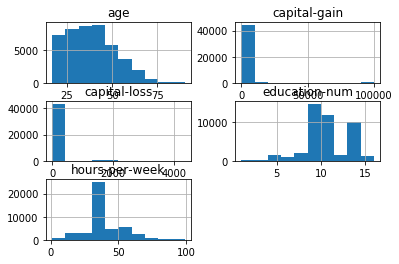

In [8]:
# Check the distribution of data for all the columns
X_data.hist()

In [9]:
X_data[['capital-gain','capital-loss']].describe()

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,1101.430344,88.595418
std,7506.430084,404.956092
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


In [10]:
# Applying log1p for skewed columns
X_data[['capital-gain','capital-loss']] =\
  np.log1p(X_data[['capital-gain','capital-loss']])
X_data[['capital-gain','capital-loss']].describe()

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,0.740759,0.355489
std,2.466527,1.595914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


In [11]:
# Observe the min,max vlaues for all columns
X_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,0.740759,0.355489,40.938017
std,13.217870,2.552881,2.466527,1.595914,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000


**Don't run the below cell more than once**

In [12]:
# Applying MinMAXScaler for numerical cols
#import the scaler
from sklearn.preprocessing import MinMaxScaler
# create an instance
sc = MinMaxScaler()
# Fit the model with the data to which we need to 
# apply scaling
sc.fit(X_data[numerical_cols])
#update the values with scaled values
X_data[numerical_cols] = \
        sc.transform(X_data[numerical_cols])

In [13]:
# Observe the min,max values for all columns are 0,1
X_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.064342,0.042423,0.407531
std,0.181067,0.170192,0.214240,0.190454,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### Categorical Columns

In [14]:
cat_cols=X_data.columns[X_data.dtypes==object]
cat_cols

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [15]:
# check the no of columns before applying OHE
print(X_data.shape)
# Applying one hot encoding for all categorical
# columns
X_data = pd.get_dummies(X_data)
# check the no of columns after applying OHE
print(X_data.shape)

(45222, 13)
(45222, 103)


In [16]:
# Observe the column names
X_data.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)

In [17]:
# Check the top five rows
X_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert the y_data 

In [18]:
# check the output you shoud get 0,1's
y_data.apply(lambda x: 1 if x=='>50K' else 0)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
45192    0
45193    0
45194    1
45195    1
45196    0
45197    1
45198    1
45199    0
45200    0
45201    0
45202    0
45203    0
45204    1
45205    0
45206    0
45207    0
45208    0
45209    0
45210    0
45211    0
45212    0
45213    0
45214    0
45215    0
45216    0
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [19]:
# y_data = data.income
# Store the result in y_data
y_data=y_data.apply(lambda x: 1 if x=='>50K' else 0)
# check the no of zeros and ones in y_data
y_data.value_counts()

0    34014
1    11208
Name: income, dtype: int64

##### Split the data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = \
    train_test_split(X_data,y_data,random_state=42,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
X_train.head()

(31655, 103)
(31655,)


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
25947,0.041096,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
39938,0.602740,0.933333,0.0,0.0,0.295918,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38364,0.068493,0.600000,0.0,0.0,0.295918,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11567,0.260274,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7173,0.123288,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
y_data.value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [22]:
y_train.value_counts(normalize=True)

0    0.752519
1    0.247481
Name: income, dtype: float64

In [23]:
y_test.value_counts(normalize=True)

0    0.751308
1    0.248692
Name: income, dtype: float64

##### Applying KNN CLASSIFIER

In [24]:
#import the classifier
from sklearn.neighbors import KNeighborsClassifier
# create an instance
knn = KNeighborsClassifier()
# train the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
# predict the outcome for test data
y_pred = knn.predict(X_test)
# import the metric
from sklearn.metrics import accuracy_score
#caluculate the test data accuracy
print('test accuracy score',\
      accuracy_score(y_test,y_pred))

test accuracy score 0.8253851256725879


In [26]:
# predict the outcome for test data
y_train_pred = knn.predict(X_train)
#caluculate the test data accuracy
print('train  accuracy score',\
      accuracy_score(y_train,y_train_pred))

train  accuracy score 0.8728794819143895


##### Applying Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
Lr =  LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
accuracy_score(y_test,Lr.predict(X_test))

0.8446229822363087

In [30]:
accuracy_score(y_train,Lr.predict(X_train))

0.841446848839046